# Blah blah blah

In [18]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import sqlite3
%matplotlib inline
import matplotlib.pyplot as plt
from joblib import dump, load



In [19]:
connection = sqlite3.connect('../data/db.sqlite')
ratings = pd.read_sql_query("SELECT * FROM ratings", connection)
clean = pd.read_sql_query("SELECT * FROM clean", connection)
dummies = pd.read_sql_query("SELECT * FROM dummies", connection)

connection.close()

## Blah Blah Blah

In [20]:
# define the model and dataframes used

model = 1
data_frame = clean
# Define features set
X = data_frame.copy()
X = X.drop(columns=['Binary Rating'])

# Define target vector
y = data_frame["Binary Rating"].values.ravel()

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)


# Save the model
dump(rf_model, f'../models/random_forest/model{model}.joblib')


['../models/random_forest/model1.joblib']

## Model Evaluation

In [21]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [22]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,607,96
Actual 1,48,1201


Accuracy Score : 0.9262295081967213
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       703
           1       0.93      0.96      0.94      1249

    accuracy                           0.93      1952
   macro avg       0.93      0.91      0.92      1952
weighted avg       0.93      0.93      0.93      1952



## Feature Importance

In [23]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.09520570705803905, 'Pre-Tax Profit Margin'),
 (0.09095535653639106, 'Long-term Debt / Capital'),
 (0.09045887350007807, 'ROI - Return On Investment'),
 (0.06686701765480275, 'ROE - Return On Equity'),
 (0.06668667492390701, 'Current Ratio'),
 (0.0652558026476725, 'Debt/Equity Ratio'),
 (0.06505024627601762, 'Net Profit Margin'),
 (0.061804863030908416, 'ROA - Return On Assets'),
 (0.051135500358185274, 'Rating Agency'),
 (0.04725965889418706, 'EBITDA Margin'),
 (0.046125179829284914, 'Gross Margin'),
 (0.04343616662295117, 'Asset Turnover'),
 (0.04025611204776603, 'EBIT Margin'),
 (0.03794530839228488, 'Return On Tangible Equity'),
 (0.03778733031305364, 'Operating Margin'),
 (0.032077946352468134, 'Sector'),
 (0.031464021766438734, 'Operating Cash Flow Per Share'),
 (0.030228233795563726, 'Free Cash Flow Per Share')]

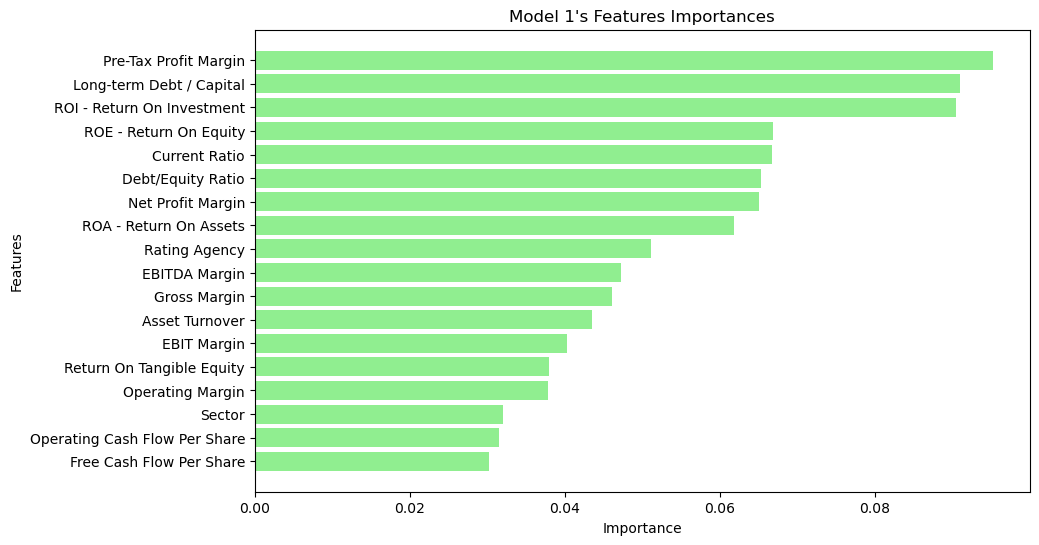

In [27]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
# importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)


plt.figure(figsize=(10, 6))
plt.barh(importances_sorted.index, importances_sorted['Feature Importances'], color='lightgreen')
plt.title(f"Model {model}'s Features Importances")
plt.xlabel('Importance')
plt.ylabel('Features')

plt.savefig(f'../img/models/random_forest/model{model}_importances_plot.png', bbox_inches='tight')

plt.show()

In [28]:
from sklearn.tree import export_graphviz
import graphviz

# Selecting a single tree from the random forest
single_tree = rf_model.estimators_[0]

# Export the selected tree 
dot_data = export_graphviz(single_tree, out_file=None, 
                           feature_names=X.columns, 
                           class_names=['Class 0', 'Class 1'], 
                           filled=True, rounded=True, 
                           special_characters=True)

# Save it, display it
graph = graphviz.Source(dot_data)

graph.view(filename='../img/models/random_forest/random_tree')

'../img/models/random_forest/random_tree.pdf'